<a href="https://colab.research.google.com/github/vivianusdjpy/WEEK-4-INDEPENDENT-PROJECT-HYPOTHESIS-TESTING/blob/master/WEEK_4_INDEPENDENT_PROJECT_HYPOTHESIS_TESTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOADING THE DATA & LIBRARIES

In [0]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as pyplot

import seaborn as sns

import pandas_profiling

from sklearn.cluster import KMeans

from numpy.random import seed

from numpy.random import randn

from statsmodels.graphics.gofplots import qqplot

%matplotlib inline

In [3]:
#loading the data
df= pd.read_csv("/content/autolib_daily_events_postal_code.csv")
df


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [4]:
df.info()
#there are no null values in the dataframe
df.duplicated().sum()
#there are no duplicated values in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


0

In [5]:
#getting the correlation matrix of the dataframe
#the correlation of an element to itself is 1 thus the larger the value is as it approaches one means that the correlation is higher
#between the two variables/elements.
df.corr()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
Postal code,1.000000,0.000432,0.000343,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
n_daily_data_points,0.000432,1.000000,0.002039,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
dayOfWeek,0.000343,0.002039,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
BlueCars_taken_sum,-0.698020,0.029411,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
BlueCars_returned_sum,-0.697519,0.030063,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
Utilib_taken_sum,-0.625521,0.022669,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
Utilib_returned_sum,-0.624786,0.023322,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
Utilib_14_taken_sum,-0.656744,0.025738,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
Utilib_14_returned_sum,-0.656516,0.026351,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
Slots_freed_sum,-0.749528,0.020873,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221


# UNIVARIATE ANALYSIS

## Postal Code 
postal code of the area (in Paris)

In [6]:
df['Postal code'].value_counts()

94130    156
92310    156
78140    156
94700    156
95100    156
        ... 
93150    151
93370    149
92340    147
93200    126
93390     84
Name: Postal code, Length: 104, dtype: int64

In [7]:
#column 1
df['Postal code'].unique()
#df.groupby(df['Postal code']).sum()
#df['Postal code'].value_counts()
#there are 104 unique postal codes 

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [0]:
df['Postal code'].isnull().sum()
#there are no null values in the postal code column

0

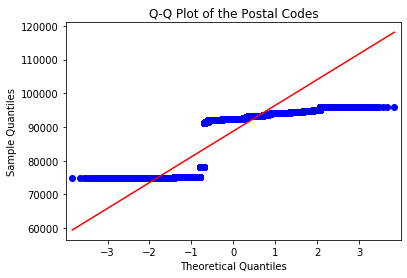

In [0]:
#Q-Q plot to show the distribution of the entries based on the postal codes.
qqplot(df['Postal code'], line='s')
pyplot.title('Q-Q Plot of the Postal Codes')
pyplot.show()

## Date
date of the row aggregation

In [0]:

df['date'].describe()
#the datatype for the date is wrong and should be changed to date_time
#there are 156 unique dates meaning that the data was taken over a period of 156 days
#2nd January 2018 has the highest records

count         16085
unique          156
top       4/30/2018
freq            104
Name: date, dtype: object

In [0]:
#changing to date_time
from datetime import datetime
#first convert the date time into string 
df['date'] =  pd.to_datetime(df['date'])
df['date'].describe()
#the data records are from first January 2018 to 19th June 2018

count                   16085
unique                    156
top       2018-06-12 00:00:00
freq                      104
first     2018-01-01 00:00:00
last      2018-06-19 00:00:00
Name: date, dtype: object

## n_daily_data_points
number of daily data points that were available for aggregation, that day

In [0]:

df['n_daily_data_points'].unique()

array([1440, 1438, 1439, 1320, 1437, 1434, 1398, 1420, 1425, 1396, 1429,
       1389, 1380, 1364, 1318, 1377, 1203, 1417, 1435, 1174, 1436, 1411,
       1370])

In [0]:
df['n_daily_data_points'].describe()
#count    16085.000000
#mean      1431.330619
#std         33.212050
#min       1174.000000
#25%       1439.000000
#50%       1440.000000
#75%       1440.000000
#max       1440.000000

count    16085.000000
mean      1431.330619
std         33.212050
min       1174.000000
25%       1439.000000
50%       1440.000000
75%       1440.000000
max       1440.000000
Name: n_daily_data_points, dtype: float64

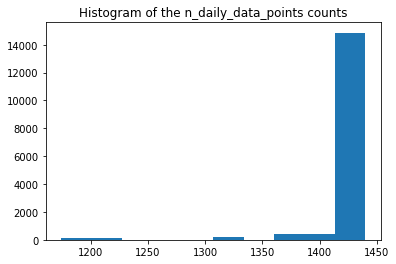

In [0]:
#Histogram of the n_daily_data_points column
pyplot.hist(df['n_daily_data_points'])
pyplot.title('Histogram of the n_daily_data_points counts')
pyplot.show()
#the data is skewed 
#the highest number of data points is 1440

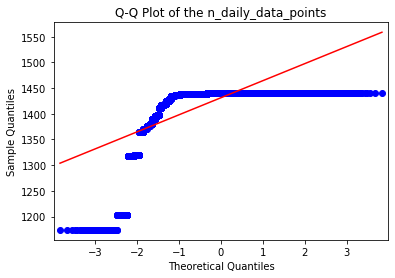

In [0]:
#Q-Q plot to show the distribution of the entries based on the n_daily_data_points.
qqplot(df['n_daily_data_points'], line='s')
pyplot.title('Q-Q Plot of the n_daily_data_points')
pyplot.show()
#The data does not follow a normal distribution

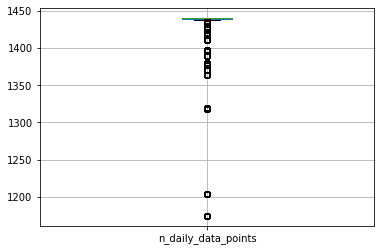

In [0]:
df.boxplot(column=['n_daily_data_points'])
#pyplot.title('Box plot of n daily datapoints')

In [0]:
df['n_daily_data_points'].skew()
#the data is skewed to the left
#has a longer tail to the left of the distribution
#outliers lie on this part of the

-5.742776211517434

## Day Of Week
identifier of weekday (0: Monday -> 6: Sunday)

In [0]:
df['dayOfWeek'].unique()
#7 days of the week

array([0, 1, 2, 3, 4, 5, 6])

In [0]:
df['dayOfWeek'].describe()
#75% of the data was recorded on saturday

count    16085.000000
mean         2.969599
std          2.008378
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: dayOfWeek, dtype: float64

In [0]:
df.groupby(df['dayOfWeek']).count()
#the data distribution has a small variation with the values ranging from 2267 to 2374

,Postal code,date,n_daily_data_points,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
dayOfWeek,,,,,,,,,,,,
0,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374
1,2363,2363,2363,2363,2363,2363,2363,2363,2363,2363,2363,2363
2,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268
3,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268
4,2271,2271,2271,2271,2271,2271,2271,2271,2271,2271,2271,2271
5,2267,2267,2267,2267,2267,2267,2267,2267,2267,2267,2267,2267
6,2274,2274,2274,2274,2274,2274,2274,2274,2274,2274,2274,2274


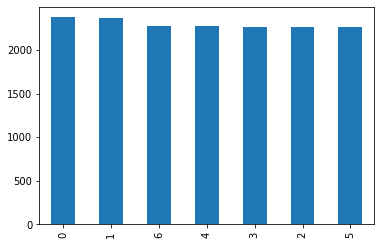

In [0]:
df['dayOfWeek'].value_counts().plot(kind='bar')
#plot of the data distribution for every day of the week.
#the Distribution has minimal variation.

## Day Type
Weekday or Weekend

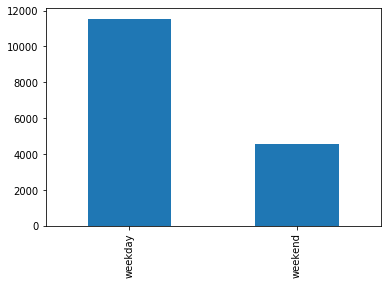

In [9]:
df['day_type'].value_counts().plot(kind='bar')
#plot of type of day of the week
#there are more entries during the weekdays than there are on weekends

## Blue Cars 

In [0]:
#Blue Cars taken sum
df['BlueCars_taken_sum'].describe()

count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: BlueCars_taken_sum, dtype: float64

(array([1.2077e+04, 1.4740e+03, 9.9900e+02, 7.6700e+02, 2.8800e+02,
        2.7600e+02, 1.2700e+02, 5.0000e+01, 1.9000e+01, 8.0000e+00]),
 array([   0. ,  135.2,  270.4,  405.6,  540.8,  676. ,  811.2,  946.4,
        1081.6, 1216.8, 1352. ]),
 <a list of 10 Patch objects>)

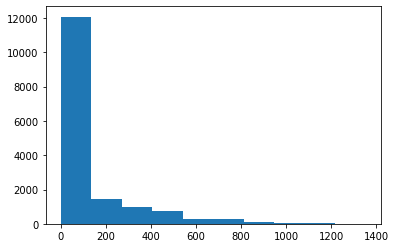

In [0]:
pyplot.hist(df['BlueCars_taken_sum'])
#The data is right skewed

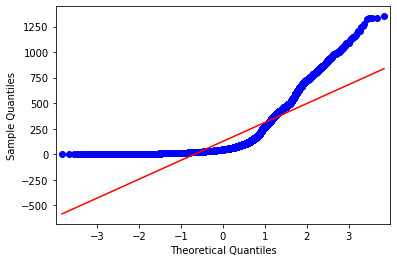

In [0]:
#Bluecars taken distribution on a Q-Q plot
qqplot(df['BlueCars_taken_sum'], line='s')
pyplot.title("Q-Q Plot of the BlueCars_taken_sum")
pyplot.show()
#Does not follow a normal distribution
#The qqplot confirms that the data is skewed

In [0]:
#Blue cars returned sum
df['BlueCars_returned_sum'].describe()

count    16085.000000
mean       125.912714
std        185.501535
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1332.000000
Name: BlueCars_returned_sum, dtype: float64

## Utilib

In [0]:
#Utilib taken sum column
df['Utilib_taken_sum'].describe()

count    16085.000000
mean         3.698290
std          5.815058
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         54.000000
Name: Utilib_taken_sum, dtype: float64

In [0]:
#Utilib returned sum column
df['Utilib_returned_sum'].describe()

count    16085.000000
mean         3.699099
std          5.824634
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         58.000000
Name: Utilib_returned_sum, dtype: float64

## Utilib 14

In [0]:
#Utilib 14 taken sum
df['Utilib_14_taken_sum'].describe()

count    16085.000000
mean         8.600560
std         12.870098
min          0.000000
25%          1.000000
50%          3.000000
75%         10.000000
max        100.000000
Name: Utilib_14_taken_sum, dtype: float64

In [0]:
#Utilib 14 returned sum
df['BlueCars_returned_sum'].describe()

count    16085.000000
mean       125.912714
std        185.501535
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1332.000000
Name: BlueCars_returned_sum, dtype: float64

## Slots
the number of charging slots that were free in that area

In [0]:
#Slots_freed_sum column
df['Slots_freed_sum'].describe()

count    16085.000000
mean        22.629033
std         52.120263
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max        360.000000
Name: Slots_freed_sum, dtype: float64

(array([1.3274e+04, 6.0800e+02, 6.4300e+02, 6.8100e+02, 4.0300e+02,
        2.6400e+02, 1.3200e+02, 5.5000e+01, 1.8000e+01, 7.0000e+00]),
 array([  0.,  36.,  72., 108., 144., 180., 216., 252., 288., 324., 360.]),
 <a list of 10 Patch objects>)

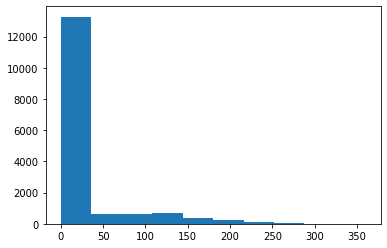

In [0]:
pyplot.hist(df['Slots_freed_sum'])
#were mostly zero meaning that most of the charging slots were not free

In [0]:
#Slots_taken_sum column
df['Slots_taken_sum'].describe()

count    16085.000000
mean        22.629282
std         52.146030
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max        359.000000
Name: Slots_taken_sum, dtype: float64

(array([1.327e+04, 6.080e+02, 6.560e+02, 6.620e+02, 4.150e+02, 2.720e+02,
        1.240e+02, 5.100e+01, 1.900e+01, 8.000e+00]),
 array([  0. ,  35.9,  71.8, 107.7, 143.6, 179.5, 215.4, 251.3, 287.2,
        323.1, 359. ]),
 <a list of 10 Patch objects>)

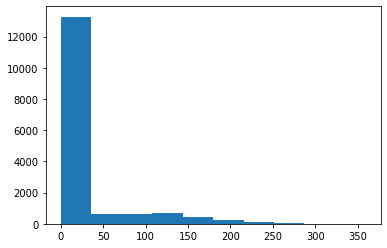

In [0]:
pyplot.hist(df['Slots_taken_sum'])
#were mostly zero meaning that most of the charging slots were not taken

# DATA CLEANING

### Validity

In [23]:
#The claim we are investigating is for the Blue cars only thus we drop utilib and utilib 14 columns
df_1 = df.drop(axis= 1, columns=['Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum',])
df_1

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20
...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,0,0


### Accuracy

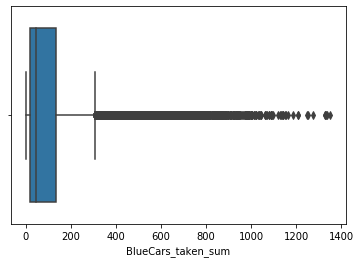

In [13]:
#Checking for outliers
sns.boxplot(x = df_1['BlueCars_taken_sum'])
#boxplot of the Blue cars taken
#There are outliers in the data since the data is right skewed

In [0]:
#Dropping outliers

### Completeness

In [15]:
df_1.isnull().sum()
#there are no null values

Postal code              0
date                     0
n_daily_data_points      0
dayOfWeek                0
BlueCars_taken_sum       0
BlueCars_returned_sum    0
Slots_freed_sum          0
Slots_taken_sum          0
dtype: int64

### Consistency

In [16]:
df_1.duplicated().sum()
#There are no duplicated columns in thne dataframe

0

### Uniformity

In [24]:
df_1.columns = ["POSTAL CODE","DATE","N_DAILY_DATA_POINTS","DAY OF WEEK","DAY TYPE","BLUECARS_TAKEN_SUM","BLUECARS_RETURNED_SUM", "SLOTS_FREED_SUM","SLOTS_TAKEN_SUM"]
df_1
#changing the column names to Uppercase

,POSTAL CODE,DATE,N_DAILY_DATA_POINTS,DAY OF WEEK,DAY TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20
...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,0,0


#DATA UNDERSTANDING(BI-VARIATE ANALYSIS)

Text(0.5, 1.0, 'Blue Cars taken sum per day')

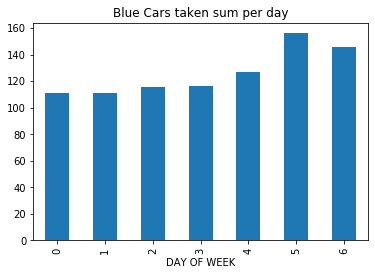

In [18]:
#Blue cars taken per day
df_2 = df_1
df_2
df_2.groupby('DAY OF WEEK')['BLUECARS_TAKEN_SUM'].mean().plot(kind='bar')
pyplot.title('Blue Cars taken sum per day')
#The highest number of Blue cars were taken on Saturday followed by Sunday

Text(0.5, 1.0, 'Blue Cars taken sum per day')

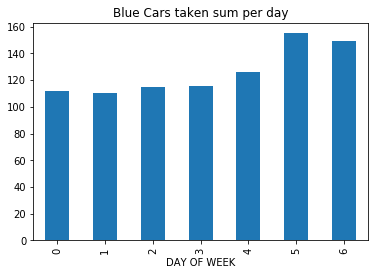

In [26]:
#Blue cars returned per day
df_3 = df_1
df_3
df_3.groupby('DAY OF WEEK')['BLUECARS_RETURNED_SUM'].mean().plot(kind='bar')
pyplot.title('Blue Cars taken sum per day')
#The highest number of Blue cars were returned on Saturday followed by Sunday

In [27]:
#Correlation between Blue cars taken and Blue Cars returned
df_4 = df_3
df_4
df_4['BLUECARS_TAKEN_SUM'].corr(df_4['BLUECARS_RETURNED_SUM'])
#There is very high correlation between the rate at which the  Blue cars are taken and returned

0.9986597051672199

In [28]:
df_4['BLUECARS_TAKEN_SUM'].corr(df_4['DAY OF WEEK'])
#There is very little correlation between How the Blue cars were taken and the day of the week

0.07964926759308416

Text(0.5, 1.0, 'Blue Cars taken sum per day')

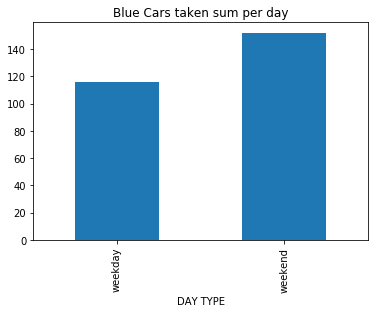

In [29]:
#Blue cars taken Weekday vs Weekend
df_3.groupby('DAY TYPE')['BLUECARS_RETURNED_SUM'].mean().plot(kind='bar')
pyplot.title('Blue Cars taken sum per day')
#Bar plot summary of how the Blue cars were picked up on weekdays vs weekends

In [39]:
df_4['DATE'] = pd.to_datetime(df_4['DATE'])
df_4.index = df_4['DATE']
df_4.resample('M').mean()


,POSTAL CODE,N_DAILY_DATA_POINTS,DAY OF WEEK,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
DATE,,,,,,,
2018-01-31,88788.165258,1434.053521,2.808138,126.189045,126.228795,21.693271,21.681377
2018-02-28,88781.706180,1435.959580,3.077342,120.368442,120.267781,22.109211,22.115041
2018-03-31,88773.654003,1436.119309,3.098587,127.231083,127.309262,23.409105,23.398744
2018-04-30,88789.831933,1421.744021,3.000970,124.467679,124.373303,22.199418,22.227537
2018-05-31,88823.854668,1423.635707,2.752647,127.436959,127.285371,23.131858,23.100096
2018-06-30,88805.431633,1436.325000,3.062245,131.380102,131.513265,23.714286,23.734184


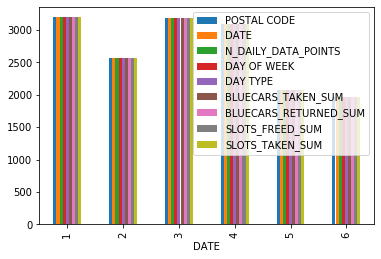

In [53]:
df_4.groupby([df_4["DATE"].dt.month]).count().plot(kind="bar")

# HYPOTHESIS